Structure has 5 nodes and 7 members


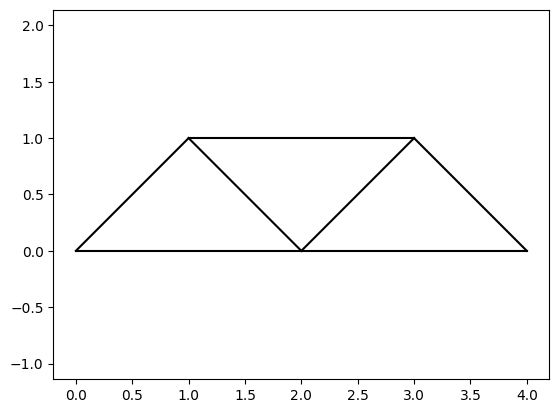

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def plot_structure(N,C):
    m,n = C.shape
    for i in range(m):
        ii = np.nonzero(C[i])
        plt.plot(N[0,ii][0],N[1,ii][0],'k')
        plt.axis('equal')
N = np.array([[0,2,4,1,3],
              [0,0,0,1,1]]) # Ignore the z direction, since they are all zero

C = np.array([
        [1,-1,0,0,0],
        [1,0,0,-1,0],
        [0,1,-1,0,0],
        [0,1,0,-1,0],
        [0,1,0,0,-1],
        [0,0,1,0,-1],
        [0,0,0,1,-1]
        ])

m,n = C.shape
print(f"Structure has {n} nodes and {m} members")
plot_structure(N,C)

Structure has 5 nodes and 7 members


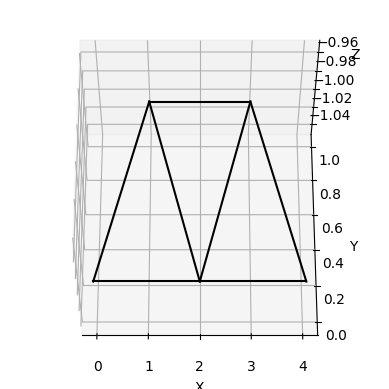

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def plot_structure(N,C):
    m,n = C.shape
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(m):
        ii = np.nonzero(C[i])
        ax.plot(N[0,ii][0],N[1,ii][0],N[2,ii][0],'k')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=60, azim=-90)  # Adjust the view

    plt.show()

N = np.array([[0,2,4,1,3],
              [0,0,0,1,1],
              [-1,-1,-1,-1,-1]])

C = np.array([
        [1,-1,0,0,0],
        [1,0,0,-1,0],
        [0,1,-1,0,0],
        [0,1,0,-1,0],
        [0,1,0,0,-1],
        [0,0,1,0,-1],
        [0,0,0,1,-1]
        ])

m,n = C.shape
print(f"Structure has {n} nodes and {m} members")
plot_structure(N,C)

In [3]:
import pandas as pd
# Optimize structure
sig = cp.Variable(m)  # There are m members
R = cp.Variable((3, n))  # Reaction force matrix

f4y = 1
f5x = 1

Fext = np.zeros((3, N.shape[1]))  # Dimension of Fext should match the number of nodes
Fext[1, 3] = -f4y
Fext[0, 4] = f5x

ii = [1, 3, 4]  # Free nodes. They should not have any reaction.

Constraints = [N @ C.T @ cp.diag(sig) @ C - Fext - R == 0, R[:, ii] == 0]
Cost = cp.sum_squares(sig)
prob = cp.Problem(cp.Minimize(Cost), Constraints)
prob.solve()

# Print solution
print("Member force densities:")
display(pd.DataFrame(sig.value))
print("Reaction Matrix")
display(pd.DataFrame((R.value).T))

Member force densities:


,0
0,2.500000e-01
1,-5.000000e-01
2,-2.500000e-01
3,-5.000000e-01
4,5.000000e-01
5,-5.000000e-01
6,-2.438777e-17


Reaction Matrix


,0,1,2
0,4.132896e-17,5.000000e-01,-0.0
1,-8.470569e-24,3.164733e-22,-0.0
2,-1.000000e+00,5.000000e-01,-0.0
3,-4.816337e-23,2.605220e-22,-0.0
4,-3.536495e-23,5.907807e-23,-0.0
